In [1]:
import os
os.chdir('/lustre/cv/projects/ALMA_IMF/2017.1.01355.L/imaging_results')

In [2]:
ls *lines*fits

W51-E_B3_spw0_12M_lines.image.fits
W51-E_B3_spw0_12M_lines.image.pbcor.fits
W51-E_B3_spw1_12M_lines.contsub.image.fits
W51-E_B3_spw1_12M_lines.image.fits
W51-E_B3_spw1_12M_lines.image.pbcor.fits
W51-E_B3_spw2_12M_lines.image.fits
W51-E_B3_spw3_12M_lines.image.fits


In [3]:
import statcont

In [4]:
from spectral_cube import SpectralCube

In [11]:
cube = SpectralCube.read('W51-E_B6_spw6_12M_lines.image.fits')

In [7]:
cube.beam_threshold = 1

In [ ]:
sigmaclipcube = cube.sigma_clip(1.8, num_cores=1, use_memmap=True, parallel=False)

/lustre/naasc/users/aginsbur/repos/spectral-cube/spectral_cube/spectral_cube.py:2709: UserWarning: parallel=True was specified but num_cores=1. Joblib will be used to run the task with a single thread.
  warnings.warn("parallel=True was specified but num_cores=1. "


In [8]:
median = cube.median(axis=0, iterate_rays=True)

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/radio_beam-0.3.1-py3.6.egg/radio_beam/multiple_beams.py:258: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/lustre/naasc/users/aginsbur/repos/spectral-cube/spectral_cube/masks.py:185: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return data[view][self.include(data=data, wcs=wcs, view=view)]
/lustre/naasc/users/aginsbur/repos/spectral-cube/spectral_cube/masks.py:629: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[n

In [9]:
pct25 = cube.percentile(25, axis=0, iterate_rays=True)

In [14]:
import pylab as pl

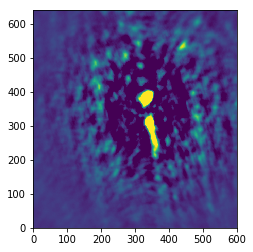

In [16]:
pl.imshow(median.value[400:-400,400:-400], origin='lower', vmax=0.05, vmin=-0.01)

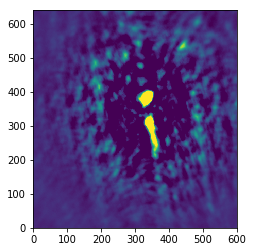

In [18]:
pl.imshow(pct25.value[400:-400,400:-400], origin='lower', vmax=0.05, vmin=-0.01)

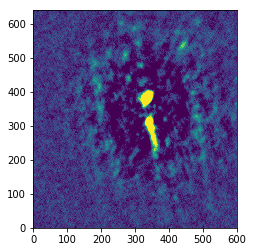

In [15]:
pl.imshow(cube[150,400:-400,400:-400].value, origin='lower', vmax=0.05, vmin=-0.01)

In [20]:
cube

VaryingResolutionSpectralCube with shape=(1920, 1440, 1400) and unit=Jy / beam:
 n_x:   1400  type_x: RA---SIN  unit_x: deg    range:   290.914025 deg:  290.954170 deg
 n_y:   1440  type_y: DEC--SIN  unit_y: deg    range:    14.488022 deg:   14.527994 deg
 n_s:   1920  type_s: FREQ      unit_s: Hz     range: 231003347114.200 Hz:231471820589.162 Hz

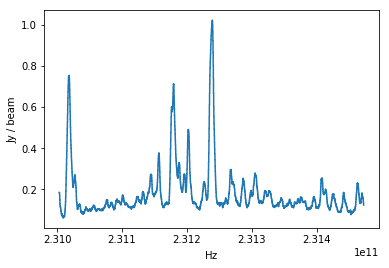

In [23]:
cube[:,780,720].quicklook()

In [6]:
cube = SpectralCube.read('W51-E_B6_spw5_12M_lines.image.fits')

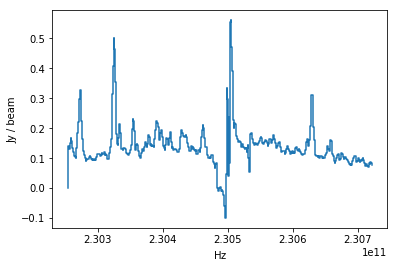

In [19]:
cube[:,780,720].quicklook()

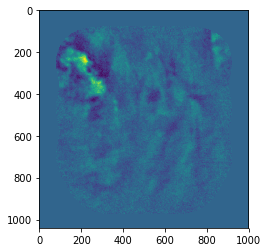

In [7]:
cube[240,200:-200,200:-200].quicklook()

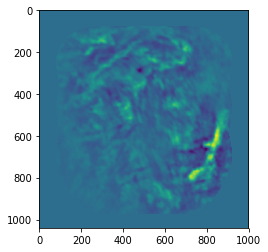

In [8]:
cube[245,200:-200,200:-200].quicklook()

In [11]:
from astropy import units as u
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio')

In [14]:
cube[225:255]

VaryingResolutionSpectralCube with shape=(30, 1440, 1400) and unit=Jy / beam:
 n_x:   1400  type_x: RA---SIN  unit_x: deg    range:   290.914025 deg:  290.954170 deg
 n_y:   1440  type_y: DEC--SIN  unit_y: deg    range:    14.488022 deg:   14.527994 deg
 n_s:     30  type_s: VRAD      unit_s: km / s  range:       36.560 km / s:      73.387 km / s

In [16]:
import numpy as np

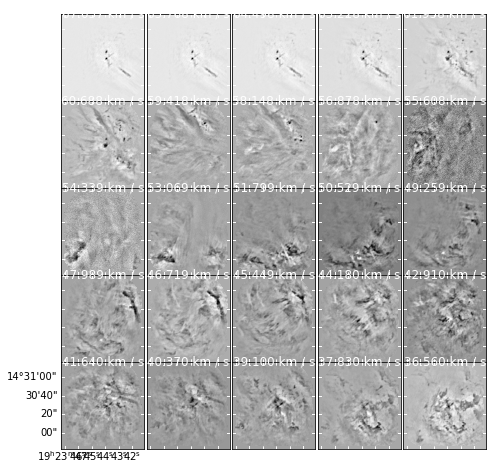

In [18]:
cube[:,250:-250,250:-250].plot_channel_maps(5, 5, np.arange(230, 255, 1))

In [21]:
import pylab as pl

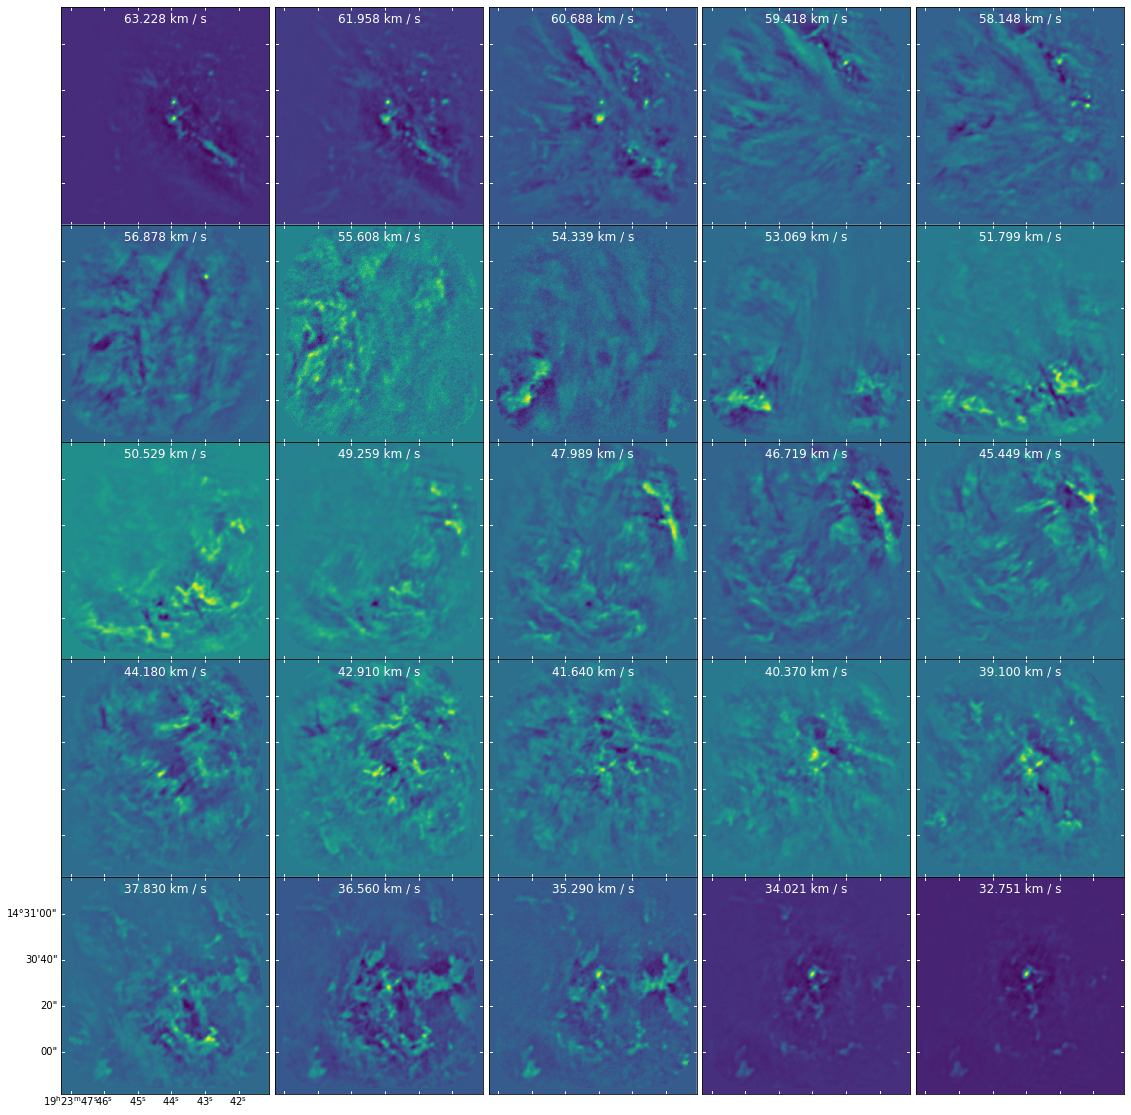

In [26]:
fig = pl.figure(figsize=(20,20))
axes = cube[:,250:-250,250:-250].plot_channel_maps(5, 5, np.arange(233, 258, 1), cmap='viridis', fig=fig, fig_smallest_dim_inches=20)

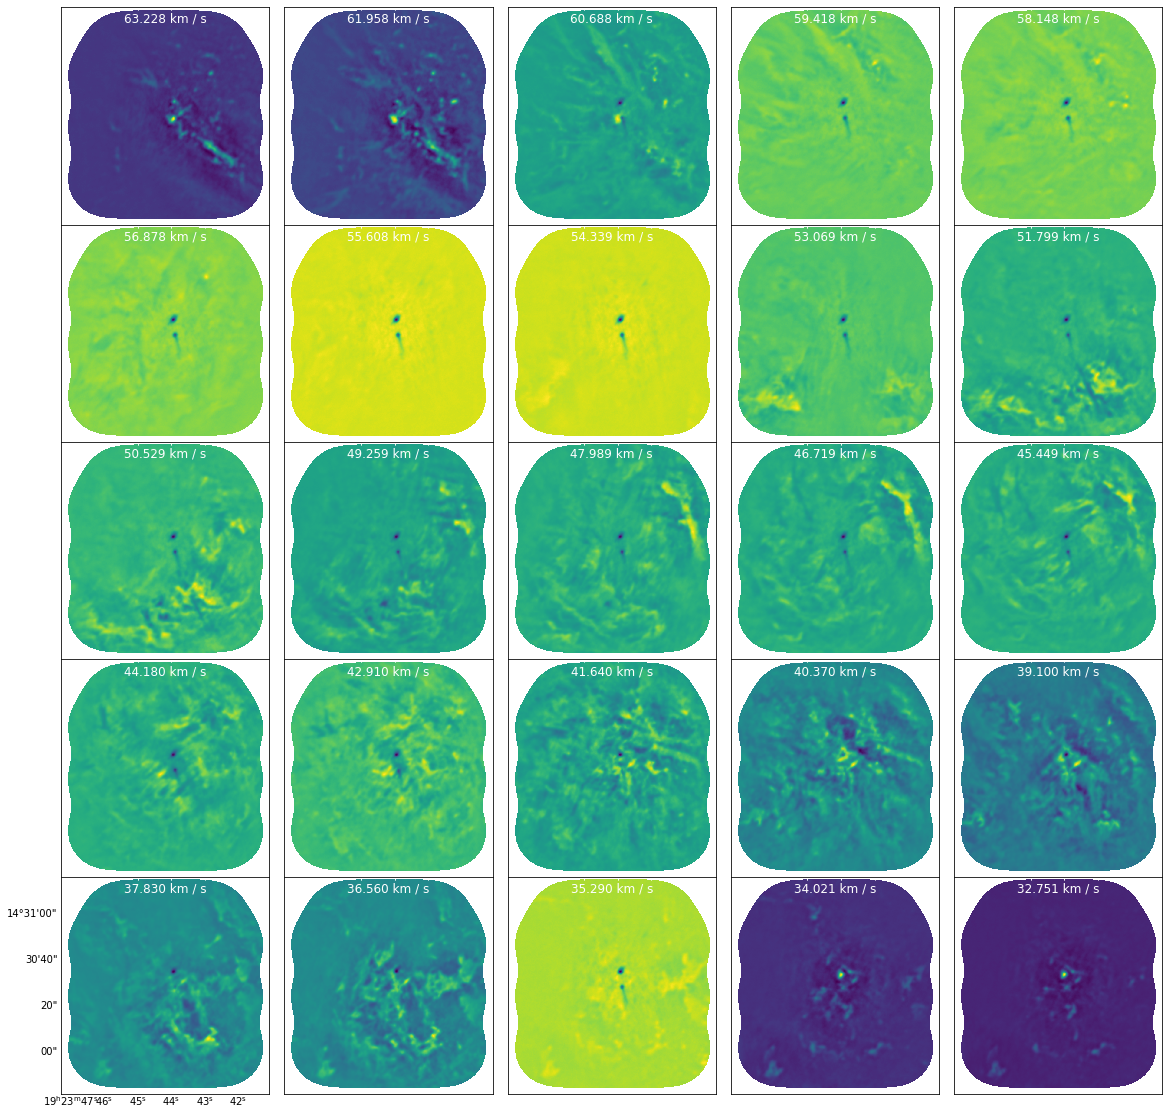

In [28]:
cube = SpectralCube.read('W51-E_B6_spw5_12M_lines.contsub.image.fits')
cube = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio')
pl.figure(figsize=(20,20))
axes = cube[:,250:-250,250:-250].plot_channel_maps(5, 5, np.arange(233, 258, 1), cmap='viridis', fig=fig, fig_smallest_dim_inches=20)